In [ ]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [ ]:
# Cargar (importar) un dataset - Mercado Inmobiliario en California
california = fetch_california_housing(download_if_missing=True)

df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
# Definir las caracteristicas (X) y la prediccion (y)
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['Price']

In [ ]:
print(X.head())
print(y.head())

   MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25

[5 rows x 8 columns]
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


In [ ]:
# Preparar el entrenamiento de los datos (particionarlos) en datos de entrenamiento y datos de prueba
tam_datos_prueba = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tam_datos_prueba, random_state=42)

In [ ]:
# Creacion de nuestro arbol de decision, el arbol tiene 3 niveles de ramificaciones (max_depth)
model = DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
# Entrenamiento del modelo con los datos de entrenamiento: X_train, y_train
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
# Realizar predicciones con los datos de test (X_test)
y_predicciones = model.predict(X_test)
print(y_predicciones)

[1.62582288 1.16511993 2.73565309 ... 4.57673829 1.16511993 1.86688424]


In [ ]:
# Hallar el MSE (Mean Squared Error - Error Cuadratico Medio)
mse = mean_squared_error(y_test, y_predicciones)
print(f"Error cuadratico medio es: {mse:.4f}")

Error cuadratico medio es: 0.6424


In [ ]:
print("Min precio:", min(y_test))
print("Max precio:", max(y_test))

Min precio: 0.14999
Max precio: 5.00001


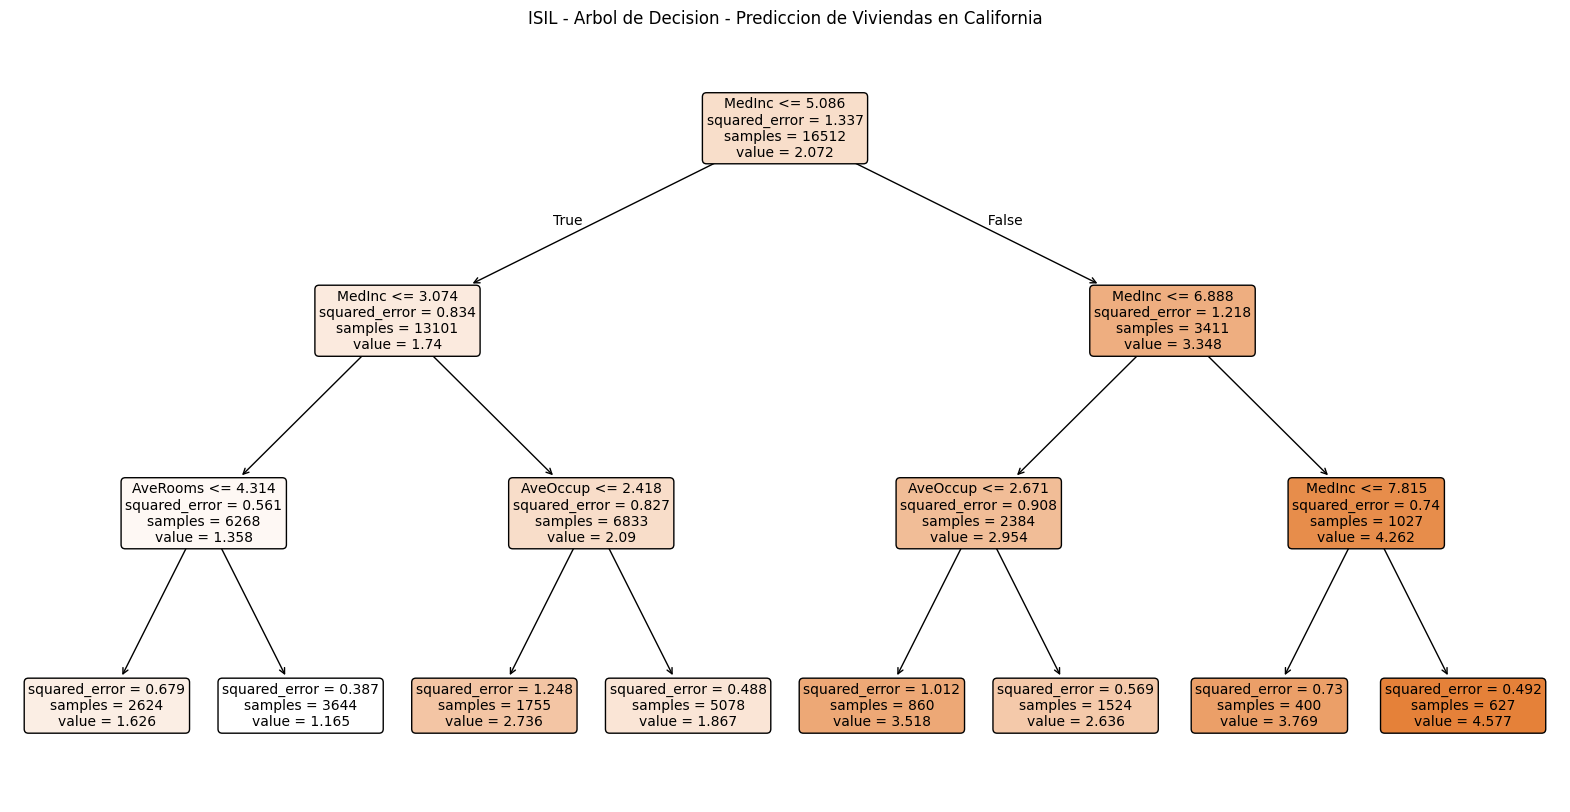

In [ ]:
# Pintar el arbol
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=california.feature_names, filled=True, rounded=True, fontsize=10)
plt.title("ISIL - Arbol de Decision - Prediccion de Viviendas en California")
plt.show()